# ML Model for Auto Insurance Industry

## EDA

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sklearn
#import imblearn

In [3]:
# Fetching the data
data = pd.read_csv(r"C:\Users\macbook\Desktop\AI & ML\assignments\3rhcxvngkl\train.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Checking the datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
# As -1 represents the null value here so replacing -1 with NaN
data_copied = data.copy()
data_unbalance = data.copy()
data_without_encoding = data.copy()

data_copied.replace(-1, np.nan, inplace=True)

In [5]:
# Checking the null values
data_copied.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


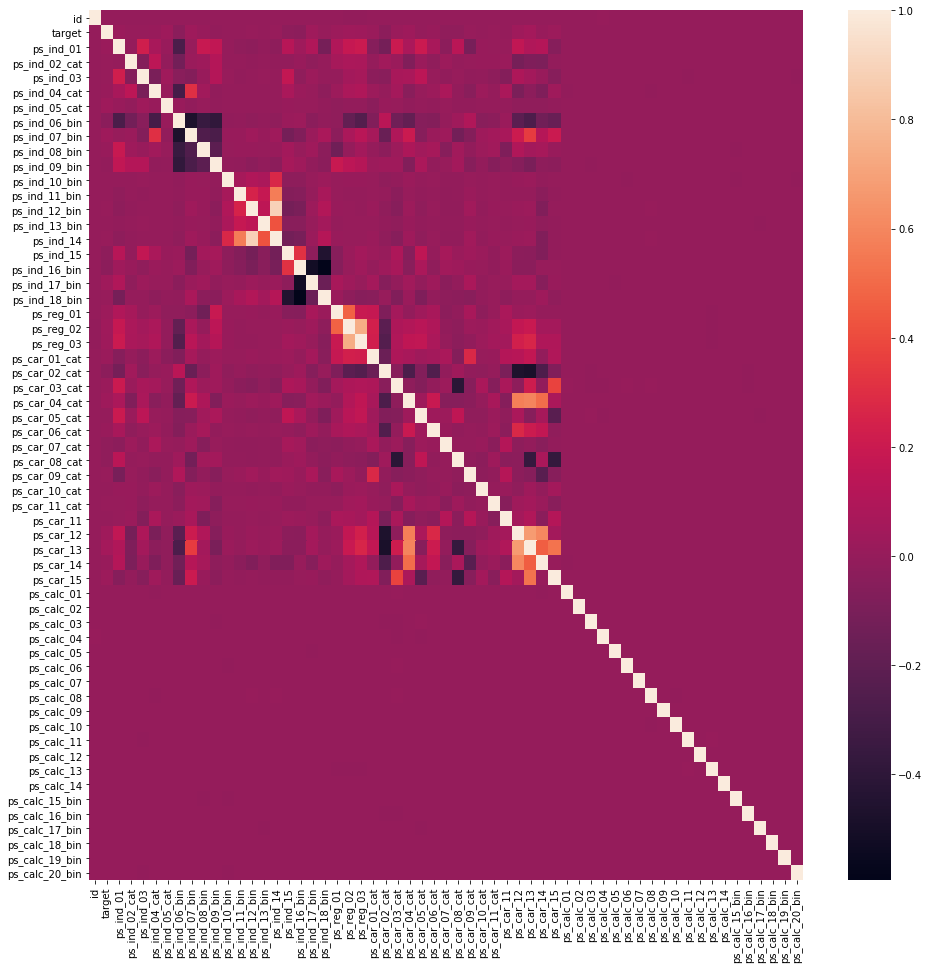

In [6]:
plt.figure(figsize=(16,16))
sns.heatmap(data_copied.corr())


In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Question 1. Write at least 3 important inferences from the data above

### So from above we can bring out the following inferences:

1. The feature "id" is an  unnecessary variable.

2. The features "ps_car_03_cat"  and "ps_car_05_cat" have maximum number of missing values. So we'll remove these.

3. The following features are highly correlated to each other:
    * "ps_ind_06_bin" and "ps_ind_07_bin"
    * "ps_ind_16_bin" and "ps_ind_18_bin"
    * "ps_ind_16_bin" and "ps_ind_17_bin"
    * "ps_car_13" and "ps_car_02_cat"
    
4. We'll substitute the rest of the missing values either through mean or mode.

5. None of the feature is highly correlated to the target feature.

6. Features with `calc` are weakly correlated to all the other features.

### Question 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion? 

In [8]:
# Checking the distribution of values in the target column
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

Looking at the above distribution we can say that the dataset is not balanced in the right proportion. Here the value 0 is significantly high as compared to 1

In [9]:
# Let's divide the features into- Binary, Categorical, Continuous, Ordinal
bina = []
cat = []
cont = []
ordi = []

column_names = list(data.columns)

for col in column_names:
    if col[-3:] == 'cat' or col == 'id':
        cat.append(col)
        
    elif col[-3:] == 'bin' or col == 'target':
        bina.append(col)
        
    elif data[col].dtype == 'int64':
        ordi.append(col)
        
    elif data[col].dtype == 'float64':
        cont.append(col)       

In [10]:
features_division = {'Binary': len(bina), 'Categorical': len(cat), 'Continuous': len(cont), 'Ordinal': len(ordi)}
features_division

{'Binary': 18, 'Categorical': 15, 'Continuous': 10, 'Ordinal': 16}

### Question 3. How many categorical features are there?


In [11]:
features_division['Categorical']

15

### Question 4. How many binary features are there? 

In [12]:
features_division['Binary']

18

### Question 5. Write inferences from data on interval variables

In [13]:
df_interval = data[cont]
df_interval.head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0


In [14]:
df_interval.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


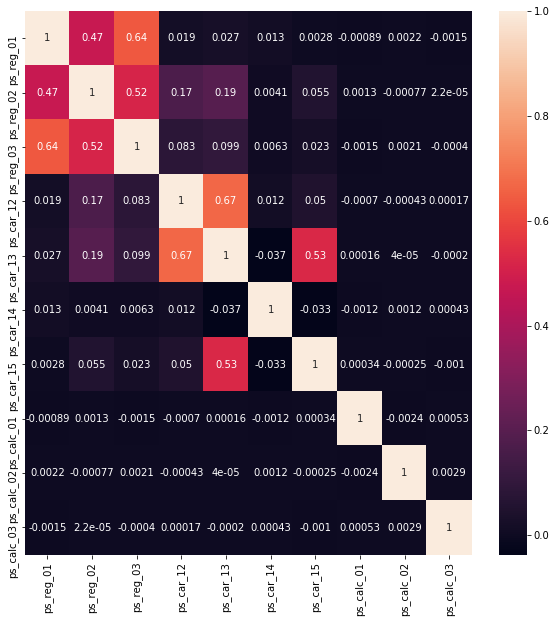

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_interval.corr(), annot=True)

1. We can see some of the variables are highly correlated like - `ps_reg_01`, `ps_reg_02`, `ps_reg_03`

2. `ps_car_12` and `ps_car_13` , `ps_car_13` and `ps_car_15` are also highly correlated

3. Other features are not significantly correlated.

4. From the above table, we can see that most of the features have low standard deviation.

### Question 6. Write inferences from data on ordinal variables. 

In [16]:
df_ordinal = data[ordi]
df_ordinal.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,2,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,3,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,1,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,1,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,3,2,2,6,3,10,2,12,3,1,1,3


In [17]:
df_ordinal.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


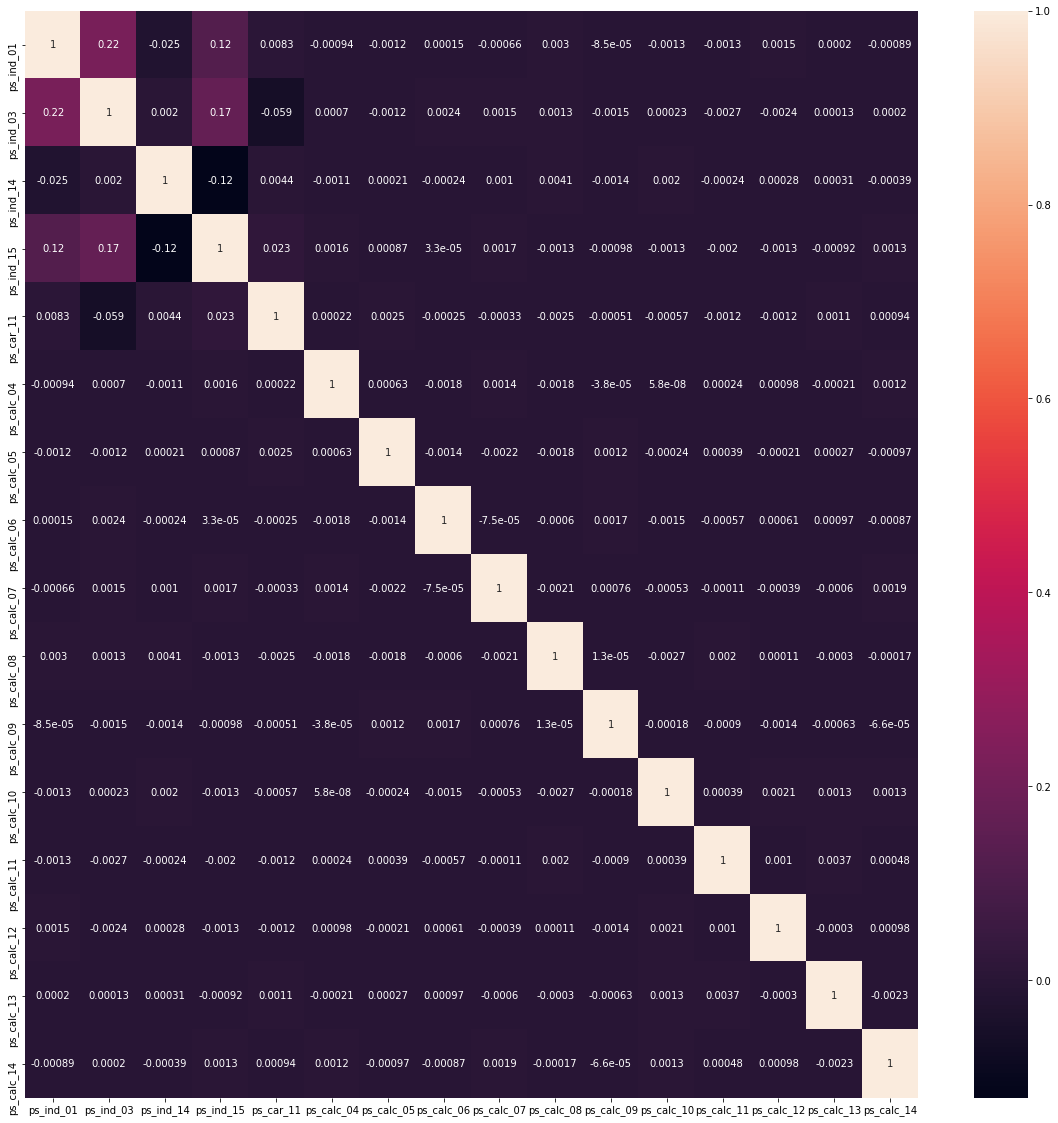

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ordinal.corr(), annot= True,fmt='.2g')

1. `ps_ind_06_bin` and `ps_ind_07_bin` are significantly correlated in 'ind' variables.

2. Very few ordinal variables are correlated to each other

3. Other features are not correlated.

4. From the above table, we can say that `ps_ind_14` has 0 value in first, second and third quantile.

5. `ps_ind_14` and `ps_car_11` have low standard deviation

### Question 7. Write inferences from data on binary variables. 

In [19]:
df_binary = data[bina]
df_binary.head()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [20]:
df_binary.describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


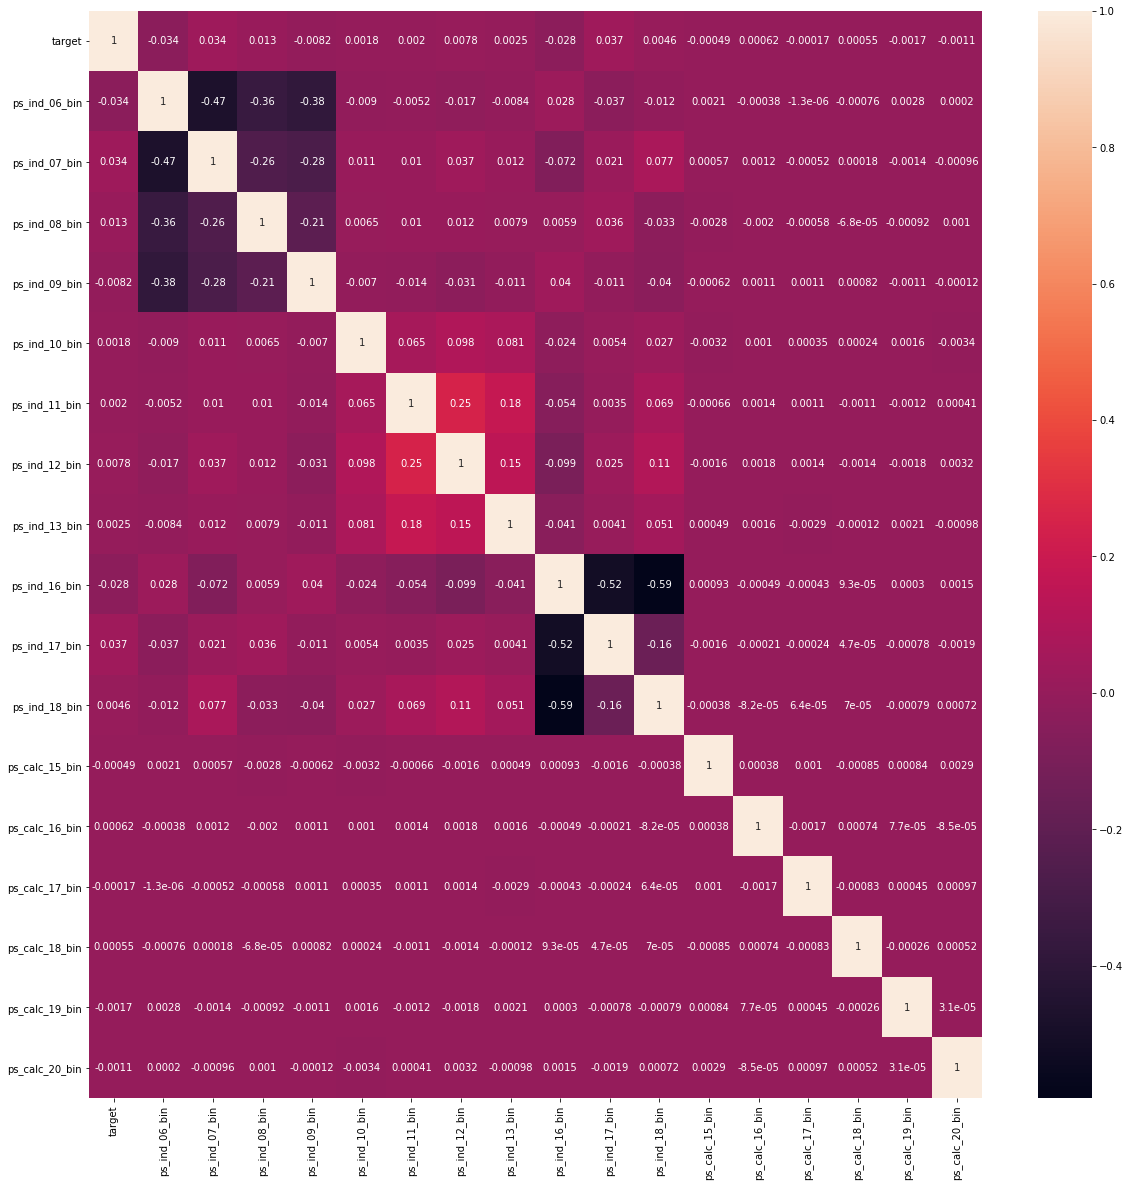

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df_binary.corr(), annot= True)

1. Few `ind` features like `ps_ind_06_bin`, `ps_ind_07_bin`, `ps_ind_08_bin` and `ps_ind_09_bin` are significantly correlated unlike others.


### Question 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance



In [22]:
counts = data['target'].value_counts()
counts

0    573518
1     21694
Name: target, dtype: int64

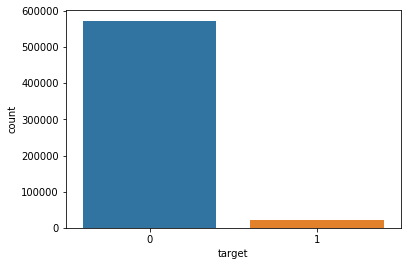

In [23]:
sns.countplot(data['target'])

In [24]:
percentage_of_zero = counts[0]/len(data['target']) * 100
percentage_of_zero

96.3552482140817

In [25]:
percentage_of_one = 100-percentage_of_zero
percentage_of_one

3.6447517859183023

**This shows that data with 0 as target value are 96.35% and 1 has only 3.64% of data. This is sign of imbalance**


### Question 9. What should be the preferred way in this case to balance the data?


As we have the following number of different target classes: 0-->573518 and 1-->21694. As our data is not in millions so it's better to go for Oversampling rather than undersampling.


For oversampling we'll use `SMOTE` method.

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote_obj = SMOTE(random_state=23)

In [28]:
x_b = data.drop(['target'], axis=1)
y_b = data['target']

In [29]:
x_smote, y_smote = smote_obj.fit_sample(x_b, y_b)

In [30]:
type(x_smote)

pandas.core.frame.DataFrame

In [31]:
x_smote

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147031,1047738,0,3,4,0,0,0,0,0,0,...,3,0,1,10,0,0,0,0,0,0
1147032,1429536,2,1,2,0,0,0,0,0,0,...,7,1,3,7,0,1,1,0,0,0
1147033,1409374,2,2,4,0,0,0,1,0,0,...,5,0,4,11,0,0,0,0,0,0
1147034,911995,1,1,1,0,0,1,0,0,0,...,5,2,3,8,0,1,0,0,0,0


In [32]:
x_smote.shape, y_smote.shape

((1147036, 58), (1147036,))

In [33]:
col = list(data.columns)
col.remove('target')
col

['id',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [34]:
x_smote.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [35]:
#x_smote=pd.DataFrame(x_smote, columns=col)
#x_smote.head()

In [36]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [37]:
y_smote = pd.DataFrame(y_smote, columns=['target'])
y_smote.head()

,target
0,0
1,0
2,0
3,0
4,0


In [38]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [39]:
zero

target    573518
dtype: int64

In [40]:
ones

target    573518
dtype: int64

In [41]:
data_copied = pd.concat([x_smote, y_smote], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


In [42]:
len(data_copied.columns)

59

### Question 10. How many training records are there after achieving a balance of 12%? 

In [43]:
smote_ratio = SMOTE(sampling_strategy=0.12)

In [44]:
x_s, y_s = smote_ratio.fit_sample(x_b, y_b)

In [45]:
type(x_s)

pandas.core.frame.DataFrame

In [46]:
x_s.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [47]:
#x_s=pd.DataFrame(x_s, columns=col)
#x_s.head()

In [48]:
type(y_s)

pandas.core.series.Series

In [49]:
y_s = pd.DataFrame(y_s, columns=['target'])
y_s.head()

,target
0,0
1,0
2,0
3,0
4,0


In [50]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [51]:
zero

target    573518
dtype: int64

In [52]:
ones

target    573518
dtype: int64

In [53]:
x_s.shape

(642340, 58)

In [54]:
y_s.shape

(642340, 1)

We got `642340` training records

In [55]:
data_copied = pd.concat([x_s, y_s], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


### Question 11. Which are the top two features in terms of missing values?



In [56]:
data_copied.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
count,6.423400e+05,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,...,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000
mean,7.439075e+05,1.884535,1.343726,4.398189,0.400903,0.412212,0.371839,0.246483,0.154614,0.173758,...,1.413728,2.841307,7.508430,0.114573,0.611144,0.536186,0.272146,0.332203,0.143757,0.107143
std,4.293268e+05,1.959766,0.651987,2.671819,0.490345,1.339364,0.483296,0.430963,0.361537,0.378902,...,1.189652,1.675768,2.714054,0.318507,0.487491,0.498689,0.445065,0.471004,0.350844,0.309295
min,7.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720900e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.436755e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.115537e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.488027e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Replacing -1 with null in data_copied
data_copied.replace(-1, np.nan, inplace=True)

In [58]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((642340, 59), (595212, 59), (595212, 59))

In [59]:
# Replacing -1 with null in data_unbalance and data_without_encoding
data_unbalance.replace(-1, np.nan, inplace=True)
data_without_encoding.replace(-1, np.nan, inplace=True)

In [60]:
data_copied.isna().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5823
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         108682
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     429463
ps_car_04_cat          0
ps_car_05_cat     273719
ps_car_06_cat          0
ps_car_07_cat      11545
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42924
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [61]:
missing_values_columns = []
count=0
for i in data_copied.columns:
    if data_copied[i].isna().sum() > 0:
        missing_values_columns.append(i)
        number = data_copied[i].isna().sum()/ len(data_copied[i])
        print("The column {} is having {} percent of missing values.".format(i, number*100))
        count+=1

The column ps_ind_02_cat is having 0.03362705109443597 percent of missing values.
The column ps_ind_04_cat is having 0.012921505744621229 percent of missing values.
The column ps_ind_05_cat is having 0.9065292524208364 percent of missing values.
The column ps_reg_03 is having 16.919699847432824 percent of missing values.
The column ps_car_01_cat is having 0.01665784475511411 percent of missing values.
The column ps_car_03_cat is having 66.85914001930442 percent of missing values.
The column ps_car_05_cat is having 42.61279073387925 percent of missing values.
The column ps_car_07_cat is having 1.7973347448391817 percent of missing values.
The column ps_car_09_cat is having 0.08858237070710216 percent of missing values.
The column ps_car_11 is having 0.0007784039605193511 percent of missing values.
The column ps_car_12 is having 0.00015568079210387023 percent of missing values.
The column ps_car_14 is having 6.682442320266525 percent of missing values.


**The features `ps_car_05_cat` and `ps_car_03_cat` are having the maximum number of missing values**

### Question 12. In total, how many features have missing values?


In [62]:
print("Total number of missing values features are: %d"%(len(missing_values_columns)))

Total number of missing values features are: 12


In [63]:
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

### Question 13. What steps should be taken to handle the missing data?


We'll drop the feature columns `ps_car_05_cat` and `ps_car_03_cat` as they have maximum number of missing values and for the rest of the columns we'll treat them using mean and mode

In [64]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_copied
data_copied.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
missing_values_columns.remove("ps_car_05_cat")
missing_values_columns.remove("ps_car_03_cat")
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [65]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_unbalance and data_without_encoding
data_unbalance.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
data_without_encoding.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)

In [66]:
# Removing "ps_car_05_cat" , "ps_car_03_cat" from cat list
cat.remove("ps_car_05_cat")
cat.remove("ps_car_03_cat")
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [67]:
# Treating other missing values columns of data_copied
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_copied[col].dtype == 'int64':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_copied[col].dtype == 'float64':
        data_copied[col].fillna(data_copied[col].mean(), inplace=True)       # Treating continuous columns

In [68]:
# Treating other missing values columns of data_unbalance
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_unbalance[col].dtype == 'int64':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_unbalance[col].dtype == 'float64':
        data_unbalance[col].fillna(data_unbalance[col].mean(), inplace=True)       # Treating continuous columns

In [69]:
data_unbalance.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [70]:
# Treating other missing values columns of data_without_encoding
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_without_encoding[col].dtype == 'int64':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_without_encoding[col].dtype == 'float64':
        data_without_encoding[col].fillna(data_without_encoding[col].mean(), inplace=True)       # Treating continuous columns

In [71]:
data_without_encoding.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [72]:
# Checking the number of null values in our dataset
number_of_columns_with_missingvalues = 0
for i in data_copied.isna().sum():
    if i>0:
        number_of_columns_with_missingvalues += 1
        
number_of_columns_with_missingvalues

0

**Thus, now there are no more missing values**

### Question 14. Which interval variables have strong correlation?


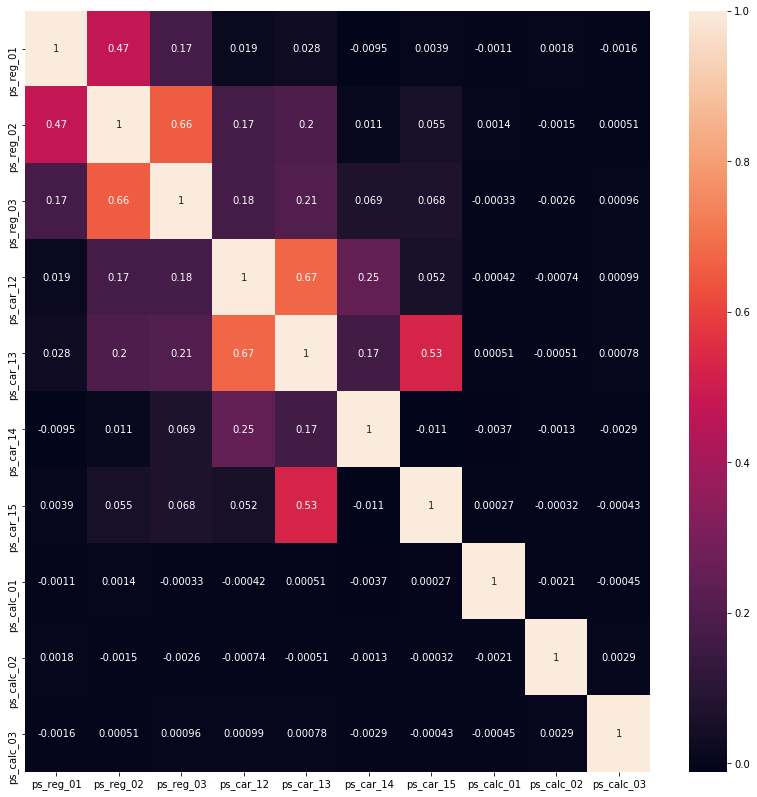

In [73]:
plt.figure(figsize=(14,14))
sns.heatmap(data_copied[cont].corr(), annot=True)

The features `ps_car_12` and `ps_car_13` have the highest correlation of `67%`

### Question 15. What's the level of correlation among ordinal features?


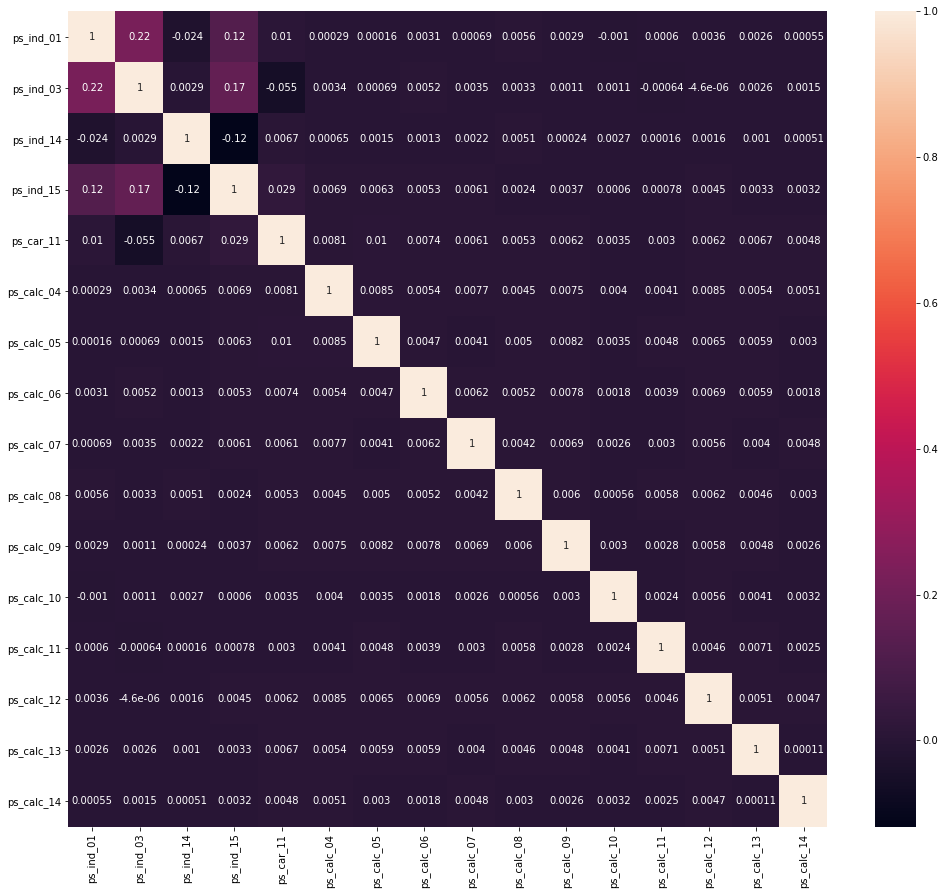

In [74]:
plt.figure(figsize=(17,15))
sns.heatmap(data_copied[ordi].corr(), annot=True)

**Ordinal variable are weakly correlated to each other**

### Question 16. Implement Hot Encoding for categorical features


In [75]:
# Checking the categorical features
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [76]:
cat_value_count = {}

for col in cat:
    cat_value_count[col] = data_copied[col].value_counts().count()
    
cat_value_count

{'id': 621698,
 'ps_ind_02_cat': 5,
 'ps_ind_04_cat': 2,
 'ps_ind_05_cat': 7,
 'ps_car_01_cat': 12,
 'ps_car_02_cat': 2,
 'ps_car_04_cat': 10,
 'ps_car_06_cat': 18,
 'ps_car_07_cat': 2,
 'ps_car_08_cat': 2,
 'ps_car_09_cat': 5,
 'ps_car_10_cat': 3,
 'ps_car_11_cat': 104}

### As "id" is a irrelevant features so we'll remove it

In [77]:
data_copied.shape

(642340, 57)

In [78]:
data_copied.drop(['id'], axis=1, inplace=True)
data_unbalance.drop(['id'], axis=1, inplace=True)
data_without_encoding.drop(['id'], axis=1, inplace=True)

In [79]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((642340, 56), (595212, 56), (595212, 56))

In [80]:
# Removing "id" feature from cat list
cat.remove("id")
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

**As the feature `ps_car_11_cat` has 104 unique values so we we'll not convert this feature using one-hot encoding, rest we'll do.**

In [81]:
cat.remove('ps_car_11_cat')

In [82]:
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat']

In [83]:
before_encoding_balanced = data_copied.copy()
before_encoding_balanced.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,0
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,0


In [84]:
# Applying get_dummies over categorical columns
dummy_df = pd.get_dummies(data_copied, columns=cat, drop_first=True)
dummy_df.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1.0,ps_car_08_cat_1,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_1,ps_car_10_cat_2
0,2,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,7,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,5,9,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,0,2,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


In [85]:
# Checking the shape of dummy_df
dummy_df.shape

(642340, 102)

In [86]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [87]:
# Columns present in dummy_df
columns_after_dummy = list(dummy_df.columns)
columns_after_dummy

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'target',
 'ps_ind_02_cat_1.0',
 'ps_ind_02_cat_2.0',
 'ps_ind_02_cat_3.0',
 'ps_ind_02_cat_4.0',
 'ps_ind_04_cat_1.0',
 'ps_ind_05_cat_1.0',
 'ps_ind_05_cat_2.0',
 'ps_ind_05_cat_3.0',
 'ps_ind_05_cat_4.0',
 'ps_ind_05_cat_5.0',
 'ps_ind_05_cat_6.0',
 'ps_car_01_cat_1.0',
 'ps_car_01_cat_2

**As we can see from above heatmaps that calculated features neither have any correlation with the target nor with other features. So we'll remove all the cal features**

In [88]:
final_col = [i for i in columns_after_dummy if 'calc' not in i]
len(final_col)

82

In [89]:
df_with_outliers = dummy_df[final_col]
df_with_outliers.shape

(642340, 82)

### Removing the outliers from the continuous features

In [90]:
overall_outliers = []
for i in final_col:
    if df_with_outliers[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(df_with_outliers[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(df_with_outliers[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = df_with_outliers[(df_with_outliers[i]<q1-iqr) | (df_with_outliers[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers.extend(outliers)        

The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 39393 outliers
The feature ps_reg_03 has 41693 outliers
The feature ps_car_11 has 28368 outliers
The feature ps_car_12 has 13162 outliers
The feature ps_car_13 has 28551 outliers
The feature ps_car_14 has 29439 outliers
The feature ps_car_15 has 28519 outliers


#### Not all the outliers rows will be removed. Only those indexes of the dataframe will be removed which are common.

In [91]:
len(overall_outliers)

209125

In [92]:
common_rows =  list((Counter(overall_outliers) - Counter(set(overall_outliers))).keys())
len(common_rows)

45451

In [93]:
# Removing outliers rows:
df_after_outliers = df_with_outliers.drop(index=common_rows, axis=0)
print("The shape after outliers removal is {}".format(df_after_outliers.shape))

The shape after outliers removal is (596889, 82)


In [94]:
df_after_outliers = df_after_outliers.reset_index(drop=True)

In [95]:
df_after_outliers.shape

(596889, 82)

In [96]:
# Removing outliers from 
#before_encoding_balanced
overall_outliers1 = []
for i in before_encoding_balanced.columns:
    if before_encoding_balanced[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(before_encoding_balanced[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(before_encoding_balanced[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = before_encoding_balanced[(before_encoding_balanced[i]<q1-iqr) | (before_encoding_balanced[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers1.extend(outliers)        

print("\n\n==========================================\n\n\n\n")

#data_unbalance
overall_outliers2 = []
for i in data_unbalance.columns:
    if data_unbalance[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_unbalance[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_unbalance[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_unbalance[(data_unbalance[i]<q1-iqr) | (data_unbalance[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers2.extend(outliers)        

print("===============================\n\n\n\n")
        
#data_without_encoding
overall_outliers3 = []
for i in data_without_encoding.columns:
    if data_without_encoding[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_without_encoding[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_without_encoding[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_without_encoding[(data_without_encoding[i]<q1-iqr) | (data_without_encoding[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers3.extend(outliers)        

The feature ps_ind_02_cat has 11392 outliers
The feature ps_ind_04_cat has 0 outliers
The feature ps_ind_05_cat has 70726 outliers
The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 39393 outliers
The feature ps_reg_03 has 41693 outliers
The feature ps_car_01_cat has 6085 outliers
The feature ps_car_07_cat has 40511 outliers
The feature ps_car_09_cat has 0 outliers
The feature ps_car_11 has 28368 outliers
The feature ps_car_12 has 13162 outliers
The feature ps_car_13 has 28551 outliers
The feature ps_car_14 has 29439 outliers
The feature ps_car_15 has 28519 outliers
The feature ps_calc_01 has 0 outliers
The feature ps_calc_02 has 0 outliers
The feature ps_calc_03 has 0 outliers






The feature ps_ind_02_cat has 11378 outliers
The feature ps_ind_04_cat has 0 outliers
The feature ps_ind_05_cat has 61394 outliers
The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 36793 outliers
The feature ps_reg_03 has 35514 outliers
The feature ps_car_01_cat has 5904 outliers
T

In [97]:
# Common rows for:
#before_encoding_balanced
common_rows1 =  list((Counter(overall_outliers1) - Counter(set(overall_outliers1))).keys())
print(len(common_rows1))

print("\n\n==============\n\n")


#data_unbalance
common_rows2 =  list((Counter(overall_outliers2) - Counter(set(overall_outliers2))).keys())
print(len(common_rows2))

print("\n\n==============\n\n")



#data_without_encoding
common_rows3 =  list((Counter(overall_outliers3) - Counter(set(overall_outliers3))).keys())
print(len(common_rows3))

75144




68277




68277


In [98]:
# Removing outliers rows from:
#before_encoding_balanced
before_encoding_balanced.drop(index=common_rows1, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(before_encoding_balanced.shape))


#data_unbalance
data_unbalance.drop(index=common_rows2, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_unbalance.shape))


#data_without_encoding
data_without_encoding.drop(index=common_rows3, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_without_encoding.shape))

The shape after outliers removal is (567196, 56)
The shape after outliers removal is (526935, 56)
The shape after outliers removal is (526935, 56)


In [99]:
# Resetting index of:
#before_encoding_balanced
before_encoding_balanced = before_encoding_balanced.reset_index(drop=True)
print(before_encoding_balanced.shape)

print("==================================")

#data_unbalance
data_unbalance = data_unbalance.reset_index(drop=True)
print(data_unbalance.shape)

print("==================================")

#data_without_encoding
data_without_encoding = data_without_encoding.reset_index(drop=True)
print(data_without_encoding.shape)

(567196, 56)
(526935, 56)
(526935, 56)


### Removing features with low variance

In [100]:
#!pip install sklearn

In [101]:
df_after_outliers.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'target', 'ps_ind_02_cat_1.0',
       'ps_ind_02_cat_2.0', 'ps_ind_02_cat_3.0', 'ps_ind_02_cat_4.0',
       'ps_ind_04_cat_1.0', 'ps_ind_05_cat_1.0', 'ps_ind_05_cat_2.0',
       'ps_ind_05_cat_3.0', 'ps_ind_05_cat_4.0', 'ps_ind_05_cat_5.0',
       'ps_ind_05_cat_6.0', 'ps_car_01_cat_1.0', 'ps_car_01_cat_2.0',
       'ps_car_01_cat_3.0', 'ps_car_01_cat_4.0', 'ps_car_01_cat_5.0',
       'ps_car_01_cat_6.0', 'ps_car_01_cat_7.0', 'ps_car_01_cat_8.0',
       'ps_car_01_cat_9.0', 'ps_car_01_cat_10.0', 'ps_car_01_cat_11.0',
       'ps_car_02_cat_1', 'ps_car_04_cat_1', 'ps_car_04_cat_2',
       'ps_

In [102]:
from sklearn.feature_selection import VarianceThreshold

In [103]:
obj = VarianceThreshold(0.01)
obj1 = VarianceThreshold(0.01)
obj2 = VarianceThreshold(0.01)
obj3 = VarianceThreshold(0.01)

In [104]:
len(df_after_outliers.columns), len(before_encoding_balanced), len(data_unbalance), len(data_without_encoding)

(82, 567196, 526935, 526935)

In [105]:
obj.fit(df_after_outliers.drop('target', axis=1))

obj1.fit(before_encoding_balanced.drop('target', axis=1))
obj2.fit(data_unbalance.drop('target', axis=1))
obj3.fit(data_without_encoding.drop('target', axis=1))

VarianceThreshold(threshold=0.01)

In [106]:
obj.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False])

In [107]:
list(obj.get_support()).count(True)

56

In [108]:
len(obj.get_support())

81

In [109]:
type(df_after_outliers.columns)

pandas.core.indexes.base.Index

In [110]:
outl_cols = list(df_after_outliers.columns)

outl_cols1 = list(before_encoding_balanced.columns)
outl_cols2 = list(data_unbalance.columns)
outl_cols3 = list(data_without_encoding.columns)

In [111]:
outl_list = [outl_cols, outl_cols1, outl_cols2, outl_cols3]

In [112]:
for i in outl_list:
    print('target' in i)

True
True
True
True


In [113]:
# Remove 'target' feature
for i in outl_list:
    i.remove('target')

for i in outl_list:
    print('target' in i)

False
False
False
False


In [114]:
for i in outl_list:
    print(len(i))

81
55
55
55


In [115]:
# Features of low variance is removed and  we ended up with the following features
support_len = len(obj.get_support())

support_len1 = len(obj1.get_support())
support_len2 = len(obj2.get_support())
support_len3 = len(obj3.get_support())


z = [outl_cols[i] for i in range(support_len) if obj.get_support()[i]==True]

z1 = [outl_cols1[i] for i in range(support_len1) if obj.get_support()[i]==True]
z2 = [outl_cols2[i] for i in range(support_len2) if obj.get_support()[i]==True]
z3 = [outl_cols3[i] for i in range(support_len3) if obj.get_support()[i]==True]

In [116]:
len(z), len(z1), len(z2), len(z3)

(56, 40, 40, 40)

In [117]:
# Checking if 'target' in z
'target' in z, 'target' in z1, 'target' in z2, 'target' in z3

(False, False, False, False)

In [118]:
final_col = ['target'] + (list(z))

final_col1 = ['target'] + (list(z1))
final_col2 = ['target'] + (list(z2))
final_col3 = ['target'] + (list(z3))

In [119]:
df_after_variance_removal = df_after_outliers[final_col]
df_after_variance_removal.shape

(596889, 57)

In [120]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((567196, 41), (526935, 41), (526935, 41))

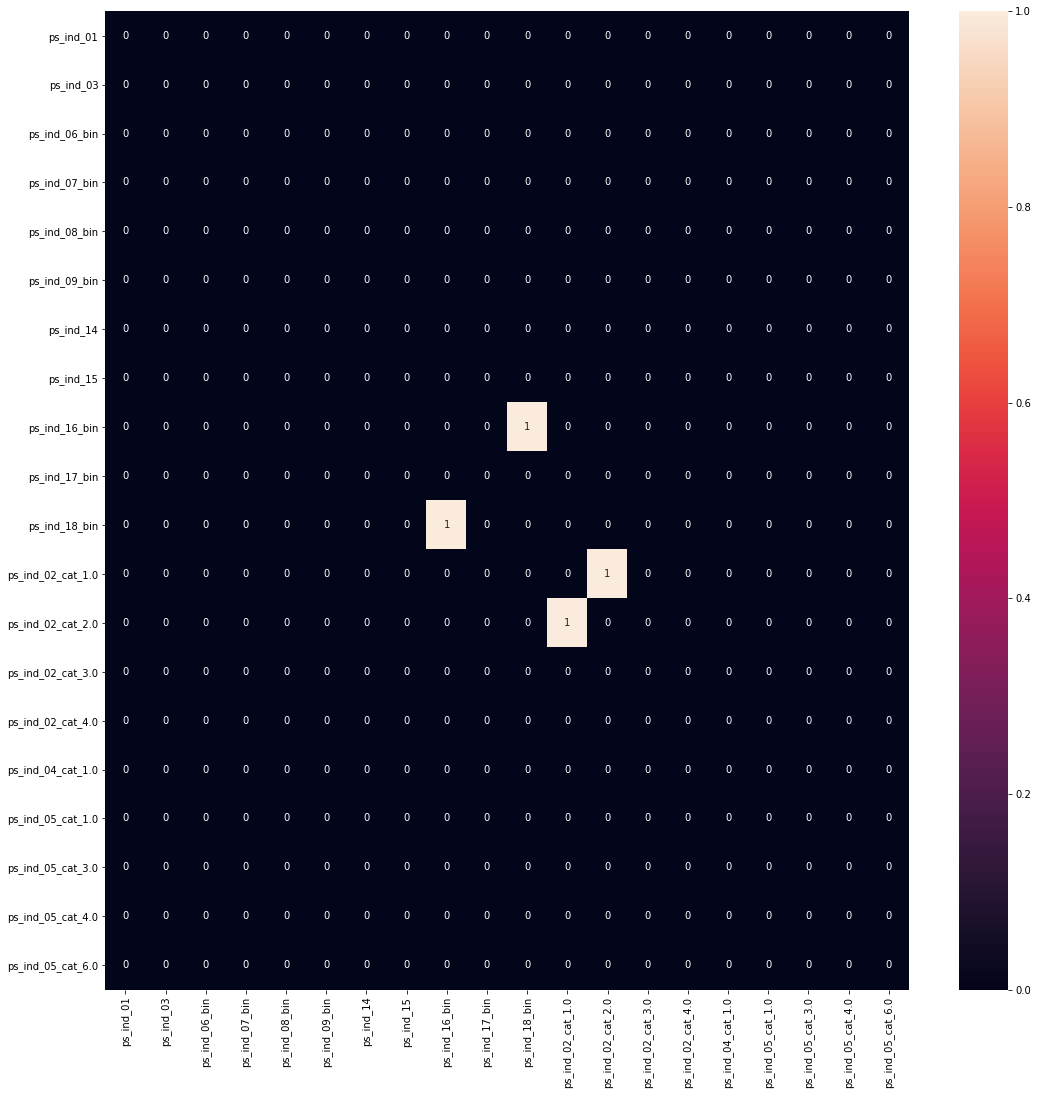

In [121]:
# Let's now find the correlation among 'ind' features
features_with_ind = [i for i in df_after_variance_removal.columns if 'ind' in i]

plt.figure(figsize=(18,18))
sns.heatmap(df_after_variance_removal[features_with_ind].corr() < -0.5 , annot=True)

### As can be seen that the features 'ps_ind_16_bin' is highly correlated with  'ps_ind_17_bin' and  'ps_ind_18_bin', so we'll remove 'ps_ind_16_bin'

In [122]:
final_col.remove('ps_ind_16_bin')

final_col1.remove('ps_ind_16_bin')
final_col2.remove('ps_ind_16_bin')
final_col3.remove('ps_ind_16_bin')

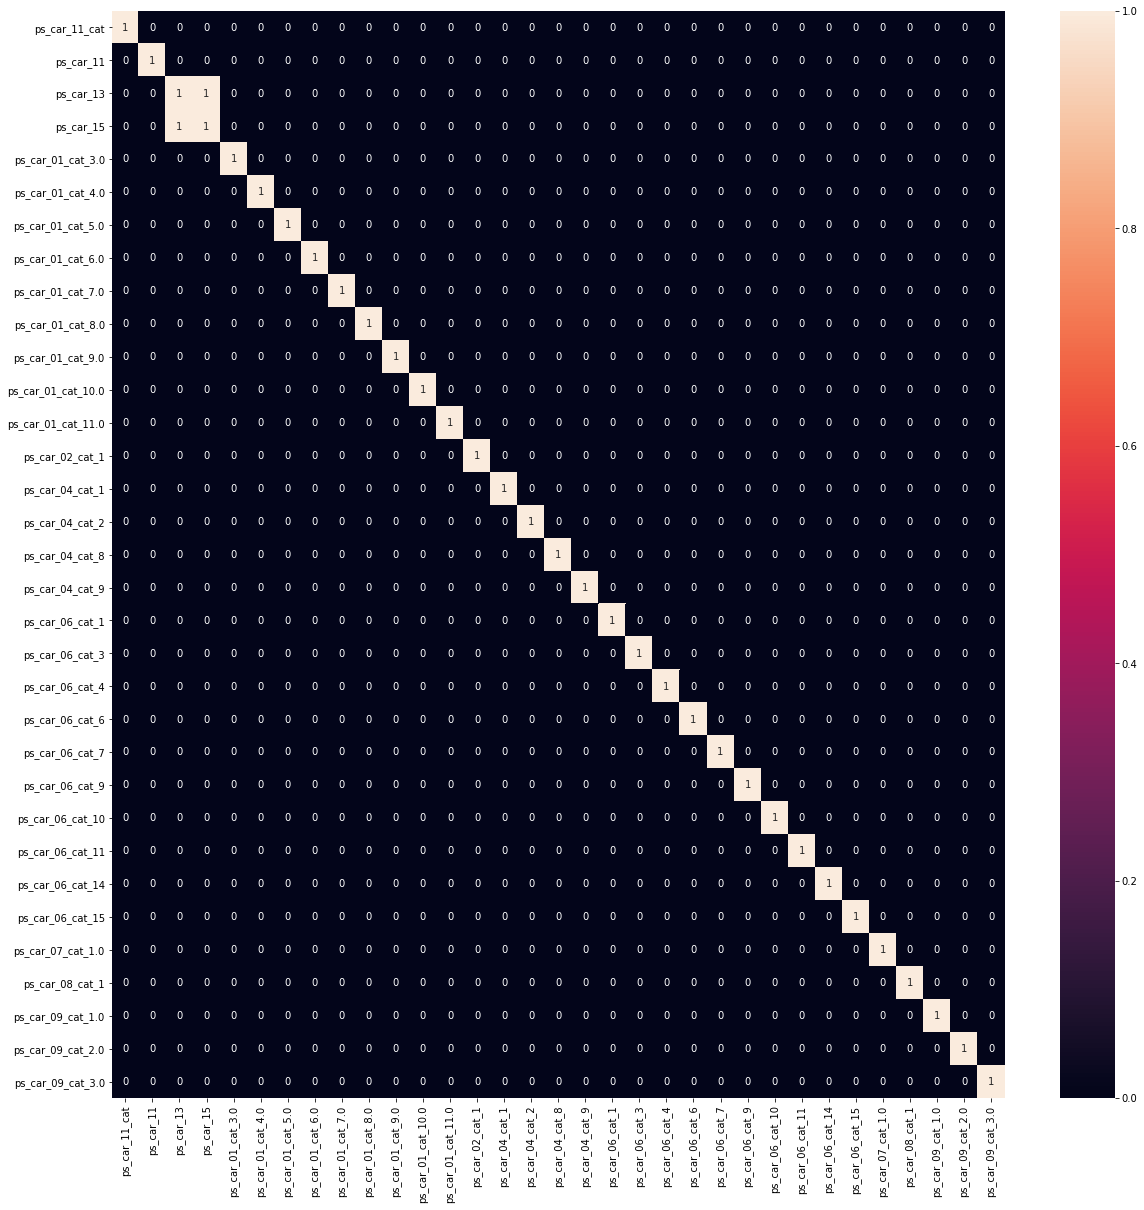

In [123]:
# Let's now find the correlation among 'car' features
features_with_car = [i for i in df_after_variance_removal.columns if 'car' in i]

plt.figure(figsize=(20,20))
sns.heatmap(df_after_variance_removal[features_with_car].corr() > 0.5, annot=True)

### As can be seen the feature "ps_car_13" and "ps_car_15" are highly correlated, so we'll remove "ps_car_15"

In [124]:
final_col.remove("ps_car_15")

final_col1.remove("ps_car_15")
final_col2.remove("ps_car_15")
final_col3.remove("ps_car_15")

In [125]:
# the final dataframe 
df_new = df_after_variance_removal[final_col]
df_new.shape

(596889, 55)

In [126]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((567196, 39), (526935, 39), (526935, 39))

## Splitting X and Y

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# For balanced data
Y = df_new['target']
X = df_new.drop('target', axis=1)

In [129]:
X.shape, Y.shape

((596889, 54), (596889,))

In [130]:
# Splitting on balanced data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=23)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((417822, 54), (179067, 54), (417822,), (179067,))

In [131]:
# For before_encoding_balanced
Y1 = before_encoding_balanced['target']
X1 = before_encoding_balanced.drop('target', axis=1)

# Splitting
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, Y1, test_size=0.3, random_state=23)
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((397037, 38), (170159, 38), (397037,), (170159,))

In [132]:
# For data_unbalance
Y2 = data_unbalance['target']
X2 = data_unbalance.drop('target', axis=1)

# Splitting 
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size=0.3, random_state=23)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((368854, 38), (158081, 38), (368854,), (158081,))

In [133]:
# For data_without_encoding
Y3 = data_without_encoding['target']
X3 = data_without_encoding.drop('target', axis=1)

# Splitting 
train_x3, test_x3, train_y3, test_y3 = train_test_split(X3, Y3, test_size=0.3, random_state=23)
train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape

((368854, 38), (158081, 38), (368854,), (158081,))

### Question 17. In nominal and interval features, which features are suitable for StandardScaler?


In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
# For balanced data
scaled_x = StandardScaler().fit_transform(train_x)
scaled_test_x = StandardScaler().fit_transform(test_x)

In [136]:
# For before_encoding_balanced
scaled_x1 = StandardScaler().fit_transform(train_x1)
scaled_test_x1 = StandardScaler().fit_transform(test_x1)

# For data_unbalance
scaled_x2 = StandardScaler().fit_transform(train_x2)
scaled_test_x2 = StandardScaler().fit_transform(test_x2)


# For data_without_encoding
scaled_x3 = StandardScaler().fit_transform(train_x3)
scaled_test_x3 = StandardScaler().fit_transform(test_x3)

### Question 18. Summarize the learnings of ED

1. Imbalanced dataset  needs to be balanced by undersampling or oversampling. 

2. If the data is in millions, then we have to do undersampling otherwise we can do oversampling. Oversampling is done by SMOTE method of imblearn.

3. Most of the features are not significantly correlated. Those correlated can be removed.

4. Ihave removed the missing values in dataset by their mean or mode.

5. We have to remove outliers which have lower values than first quantile and more than third quantile.

6. We have divided the dataframe into categorical, ordinal, continuous and binary and seen their relation with each other.

7. We can remove features with low variance by VarianceThresold.

8. We have scaled the data by Standard Scaler method.

# Modelling

In [137]:
# Index to my code above
# 1--> For before_encoding_balanced  --> Balanced
# 2--> For data_unbalance
# 3--> For data_without_encoding   --> Without balanced

### Question 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [139]:
# Creating object for Logistic Regression
log2 = LogisticRegression(max_iter=1000)

# Fitting the model
logistic_model2 = log2.fit(scaled_x2, train_y2)

# Making predictions
predictions_logistic2 = logistic_model2.predict(scaled_test_x2)

In [140]:
# Confusion Matrix
confusion_matrix(test_y2, predictions_logistic2)

array([[152739,      0],
       [  5342,      0]], dtype=int64)

In [141]:
# Accuracy
ac = accuracy_score(test_y2, predictions_logistic2)
print("The accuracy is {}".format(ac))

# Precision
prec = precision_score(test_y2, predictions_logistic2)
print("The Precision is {}".format(prec))

# Recall
rec = recall_score(test_y2, predictions_logistic2)
print("The Recall is {}".format(rec))

The accuracy is 0.9662071975759262
The Precision is 0.0
The Recall is 0.0


C:\Users\khand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even though the accuracy is coming as 96% which is very high but still we can't comment that the model is accurate as it's a classification model and accuracy is seen with the precision and recall values and here pecision and recall values are zero which is not good.

So we don't need such a model.

### Question 2. Why do you think f1-score is 0.0?


In [142]:
f1_score(test_y2, predictions_logistic2)

0.0

f1 score is 0 because precision and recall values are zero.

### Question 3. What is the precision and recall score for the model?


In [143]:
# Precision
precision_score(test_y2, predictions_logistic2)

0.0

In [144]:
# Recall
recall_score(test_y2, predictions_logistic2)

0.0

### Question 4. What is the most important inference you can draw from the result?


As can be seen from the confusion matrix we have False Negative = 5342 which is wrongly predicted as it's the number of people who shouldn't be given the insurance but with prediction they were provided. This high number for FN will lead to loss for the company so for a good model we should have High TP and High TN and low FP and FN.

### Question 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [145]:
# Creating object for Logistic Regression
log = LogisticRegression(max_iter=1000)

# Fitting the model
logistic_model = log.fit(scaled_x, train_y)

# Making predictions
predictions_logistic = logistic_model.predict(scaled_test_x)

# Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [146]:
confusion_matrix(test_y, predictions_logistic)

array([[160692,     48],
       [  8740,   9587]], dtype=int64)

In [147]:
# Accuracy
ac = accuracy_score(test_y, predictions_logistic)
print("The accuracy is {}".format(ac))

# Precision
prec = precision_score(test_y, predictions_logistic)
print("The Precision is {}".format(prec))

# Recall
rec = recall_score(test_y, predictions_logistic)
print("The Recall is {}".format(rec))

The accuracy is 0.95092339738757
The Precision is 0.9950181629475869
The Recall is 0.5231079827576799


### Question 6. Why do you think f1-score has improved? 

As compared to the previous model where precision and recall were both 0 but here precision = 0.9 and recal = 0.5 which has lead to an improved f1-score.

### Question 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement 


In [148]:
from sklearn.svm import LinearSVC

## With dual=False, max_iter=500

In [149]:
s= LinearSVC(dual= False, max_iter=500)
s.fit(scaled_x, train_y)

LinearSVC(dual=False, max_iter=500)

In [150]:
pred_svc= s.predict(scaled_test_x)

In [151]:
accuracy_score(test_y, pred_svc)

0.9491475257864375

In [152]:
confusion_matrix(test_y, pred_svc)

array([[160740,      0],
       [  9106,   9221]], dtype=int64)

## With dual=True, max_iter=1500

In [153]:
#s2= LinearSVC(dual= True, max_iter=20000)
#s2.fit(scaled_x, train_y)

#pred_svc= s2.predict(scaled_test_x)

In [154]:
#accuracy_score(test_y, pred_svc)

In [155]:
#confusion_matrix(test_y, pred_svc)

### Question 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores? 

In [156]:
train_x2.shape

(368854, 38)

In [157]:
x_svc2= scaled_x2[:100000, ]
y_svc2= train_y2[:100000, ]

In [158]:
s2= LinearSVC(dual= False, max_iter=500)
s2.fit(x_svc2, y_svc2)

LinearSVC(dual=False, max_iter=500)

In [159]:
pred_svm2= s2.predict(test_x2)

In [160]:
accuracy_score(test_y2, pred_svm2)

0.9662071975759262

In [161]:
confusion_matrix(test_y2, pred_svm2)

array([[152739,      0],
       [  5342,      0]], dtype=int64)

### Question 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason? 

In [162]:
##!pip install xgboost

In [163]:
from xgboost import XGBClassifier

In [164]:
scaled_x1.shape

(397037, 38)

In [165]:
# Balanced non-encoded
xg= XGBClassifier()
xg.fit(scaled_x1, train_y1)
pred_xgb1= xg.predict(scaled_test_x1)

accuracy_score(test_y1, pred_xgb1)

0.17121045610282148

In [166]:
confusion_matrix(test_y1, pred_xgb1)

array([[ 13442, 140632],
       [   394,  15691]], dtype=int64)

In [167]:
f1_score(test_y1, pred_xgb1)

0.18202171592965521

In [168]:
test_y1.value_counts()

0    154074
1     16085
Name: target, dtype: int64

In [169]:
pred_xgb1.tolist().count(0), pred_xgb1.tolist().count(1)

(13836, 156323)

### Question 10. What is the increase in number of features after one-hot encoding of the data? 

In [170]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [171]:
print("Therefore increase in the features is {}".format(102-56))

Therefore increase in the features is 46


### Question 11. Is there any improvement in scores after encoding?



In [172]:
scaled_x.shape

(417822, 54)

In [173]:
# Balanced With encoding
xg= XGBClassifier()
xg.fit(scaled_x, train_y)
pred_xgb= xg.predict(scaled_test_x)

accuracy_score(test_y, pred_xgb)

0.26222587076345727

In [174]:
confusion_matrix(test_y, pred_xgb)

array([[ 29794, 130946],
       [  1165,  17162]], dtype=int64)

In [175]:
precision_score(test_y, pred_xgb)

0.11587490209846868

In [176]:
recall_score(test_y, pred_xgb)

0.9364325858023681

In [177]:
f1_score(test_y, pred_xgb)

0.20623066061825937

In [178]:
import xgboost as xgb
params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True}
d_train = xgb.DMatrix(scaled_x, train_y)
d_valid = xgb.DMatrix(scaled_test_x, test_y)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=2500
xgb_model_log = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=100,
                           maximize=True, verbose_eval=100)

[19:15:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72718	valid-auc:0.72459
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[100]	train-auc:0.85149	valid-auc:0.80153
Stopping. Best iteration:
[72]	train-auc:0.84365	valid-auc:0.80389



### Question 12. If not missing a positive sample is the priority which model is best so far?


Logistic regression

### Question 13. If not marking negative sample as positive is top priority, which model is best so far?


XG Boost

### Question 14. Do you think using AdaBoost can give any significant improvement over XGBoost?


In [179]:
from sklearn.ensemble import AdaBoostClassifier

In [180]:
ada= AdaBoostClassifier()

In [181]:
ada.fit(scaled_x, train_y)

AdaBoostClassifier()

In [182]:
pred_ada= ada.predict(scaled_test_x)

In [183]:
accuracy_score(test_y, pred_ada)

0.9509457353951314

In [184]:
confusion_matrix(test_y, pred_ada)

array([[160339,    401],
       [  8383,   9944]], dtype=int64)

### Question 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

In [185]:
from sklearn.neural_network import MLPClassifier

In [186]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.000000001, activation='relu')

In [187]:
clf.fit(scaled_x, train_y)
y_pred = clf.predict(scaled_test_x)

Iteration 1, loss = 0.17913710
Iteration 2, loss = 0.16540490
Iteration 3, loss = 0.16272021
Iteration 4, loss = 0.16092664
Iteration 5, loss = 0.15953225
Iteration 6, loss = 0.15811501
Iteration 7, loss = 0.15719269
Iteration 8, loss = 0.15592392
Iteration 9, loss = 0.15485494
Iteration 10, loss = 0.15383215
Iteration 11, loss = 0.15271626
Iteration 12, loss = 0.15160296
Iteration 13, loss = 0.15059926
Iteration 14, loss = 0.14948488
Iteration 15, loss = 0.14836763
Iteration 16, loss = 0.14716120
Iteration 17, loss = 0.14627177
Iteration 18, loss = 0.14504403
Iteration 19, loss = 0.14404140
Iteration 20, loss = 0.14282939
Iteration 21, loss = 0.14205868
Iteration 22, loss = 0.14084069
Iteration 23, loss = 0.14002009
Iteration 24, loss = 0.13905443
Iteration 25, loss = 0.13785076
Iteration 26, loss = 0.13702948
Iteration 27, loss = 0.13610944
Iteration 28, loss = 0.13505433
Iteration 29, loss = 0.13432507
Iteration 30, loss = 0.13358034
Iteration 31, loss = 0.13272235
Iteration 32, los

C:\Users\khand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [188]:
accuracy_score(test_y, y_pred)

0.9455399375652689

In [189]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[157788,   2952],
       [  6800,  11527]], dtype=int64)

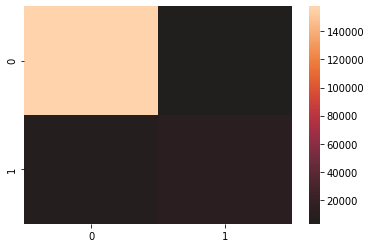

In [190]:
sns.heatmap(cm, center=True)
plt.show()

In [191]:
f1_score(test_y, y_pred)

0.7027373041516796

For 100 layer size f1-score we got is 0.70

### Question 16. At what layer size we get the best f1-score?

In [ ]:
for i in [100, 200, 250, 300, 350, 400, 500, 600]:
    clf = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=300, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.0001, activation='relu')
    clf.fit (scaled_x, train_y)
    y_pred = clf.predict(scaled_test_x)
    
    f1 = f1_score(test_y, y_pred)
    
    print("The f1 score for {} is {}".format(i,f1))

Iteration 1, loss = 0.17913710
Iteration 2, loss = 0.16540490
Iteration 3, loss = 0.16272021
Iteration 4, loss = 0.16092664
Iteration 5, loss = 0.15953225
Iteration 6, loss = 0.15811501
Iteration 7, loss = 0.15719269
Iteration 8, loss = 0.15592392
Iteration 9, loss = 0.15485494
Iteration 10, loss = 0.15383215
Iteration 11, loss = 0.15271626
Iteration 12, loss = 0.15160296
Iteration 13, loss = 0.15059926
Iteration 14, loss = 0.14948488
Iteration 15, loss = 0.14836763
Iteration 16, loss = 0.14716120
Iteration 17, loss = 0.14627177
Iteration 18, loss = 0.14504403
Iteration 19, loss = 0.14404140
Iteration 20, loss = 0.14282939
Iteration 21, loss = 0.14205868
Iteration 22, loss = 0.14084069
Iteration 23, loss = 0.14002009
Iteration 24, loss = 0.13905443
Iteration 25, loss = 0.13785076
Iteration 26, loss = 0.13702948
Iteration 27, loss = 0.13610944
Iteration 28, loss = 0.13505433
Iteration 29, loss = 0.13432507
Iteration 30, loss = 0.13358034
Iteration 31, loss = 0.13272235
Iteration 32, los

Iteration 253, loss = 0.09258134
Iteration 254, loss = 0.09287641
Iteration 255, loss = 0.09289026
Iteration 256, loss = 0.09235749
Iteration 257, loss = 0.09301369
Iteration 258, loss = 0.09272381
Iteration 259, loss = 0.09225592
Iteration 260, loss = 0.09274268
Iteration 261, loss = 0.09242634
Iteration 262, loss = 0.09214507
Iteration 263, loss = 0.09253160
Iteration 264, loss = 0.09231801
Iteration 265, loss = 0.09223461
Iteration 266, loss = 0.09261484
Iteration 267, loss = 0.09179214
Iteration 268, loss = 0.09249246
Iteration 269, loss = 0.09201575
Iteration 270, loss = 0.09169658
Iteration 271, loss = 0.09210892
Iteration 272, loss = 0.09207516
Iteration 273, loss = 0.09203573
Iteration 274, loss = 0.09192338
Iteration 275, loss = 0.09215947
Iteration 276, loss = 0.09161494
Iteration 277, loss = 0.09167615
Iteration 278, loss = 0.09193959
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The f1 score for 100 is 0.6984859058773554
Iteration

Iteration 223, loss = 0.05224695
Iteration 224, loss = 0.05173532
Iteration 225, loss = 0.05183473
Iteration 226, loss = 0.05076280
Iteration 227, loss = 0.05183255
Iteration 228, loss = 0.05237469
Iteration 229, loss = 0.05088348
Iteration 230, loss = 0.05126834
Iteration 231, loss = 0.05167666
Iteration 232, loss = 0.05090925
Iteration 233, loss = 0.05198859
Iteration 234, loss = 0.05058425
Iteration 235, loss = 0.05124676
Iteration 236, loss = 0.05104787
Iteration 237, loss = 0.04993528
Iteration 238, loss = 0.05152227
Iteration 239, loss = 0.05042022
Iteration 240, loss = 0.05082358
Iteration 241, loss = 0.05007028
Iteration 242, loss = 0.04988824
Iteration 243, loss = 0.05136583
Iteration 244, loss = 0.05053040
Iteration 245, loss = 0.05030951
Iteration 246, loss = 0.05002340
Iteration 247, loss = 0.05086267
Iteration 248, loss = 0.04912593
Iteration 249, loss = 0.05049865
Iteration 250, loss = 0.04915273
Iteration 251, loss = 0.04994283
Iteration 252, loss = 0.04945722
Iteration 

C:\Users\khand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


The f1 score for 250 is 0.6884463559771401
Iteration 1, loss = 0.17411399


We can see with size of 100 we are getting the best f1-score.

 # END